<a href="https://colab.research.google.com/github/AgainstEntropy/ECE-GY-6143-ML/blob/main/7_trees_ensembles_in_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demo: Decision trees and ensembles
==================================

*Fraida Fund*

This is a simple demo notebook that demonstrates a decision tree classifier or an ensemble of decision trees.

**Attribution**: Parts of this notebook are slightly modified from [this tutorial from “Intro to Data Mining”](http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial6/tutorial6.html).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [ ]:
df = pd.read_csv('http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial6/vertebrate.csv')
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


We’l make it a binary classification problem:

In [ ]:
df['Class'] = df['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


Decision tree
-------------

In [ ]:
y = df['Class']
X = df.drop(['Name','Class'],axis=1)

clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt = clf_dt.fit(X, y)

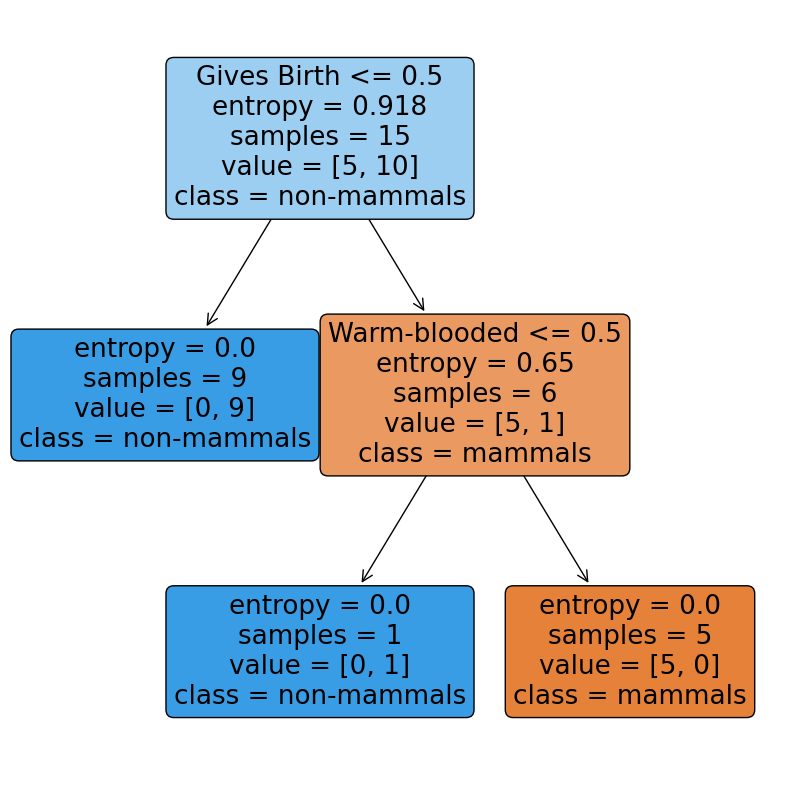

In [ ]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(clf_dt,
                    feature_names = df.columns.drop(['Name', 'Class']),
                    class_names = ["mammals", "non-mammals"],
                    filled=True, rounded=True);

### Feature importance

In [ ]:
df_importance = pd.DataFrame({'feature': df.columns.drop(['Name', 'Class']),
                              'importance': clf_dt.feature_importances_})
df_importance

,feature,importance
0,Warm-blooded,0.283143
1,Gives Birth,0.716857
2,Aquatic Creature,0.000000
3,Aerial Creature,0.000000
4,Has Legs,0.000000
5,Hibernates,0.000000


Bagged tree
-----------

In [ ]:
n_tree = 3
clf_bag = BaggingClassifier(n_estimators=n_tree)
clf_bag = clf_bag.fit(X, y)

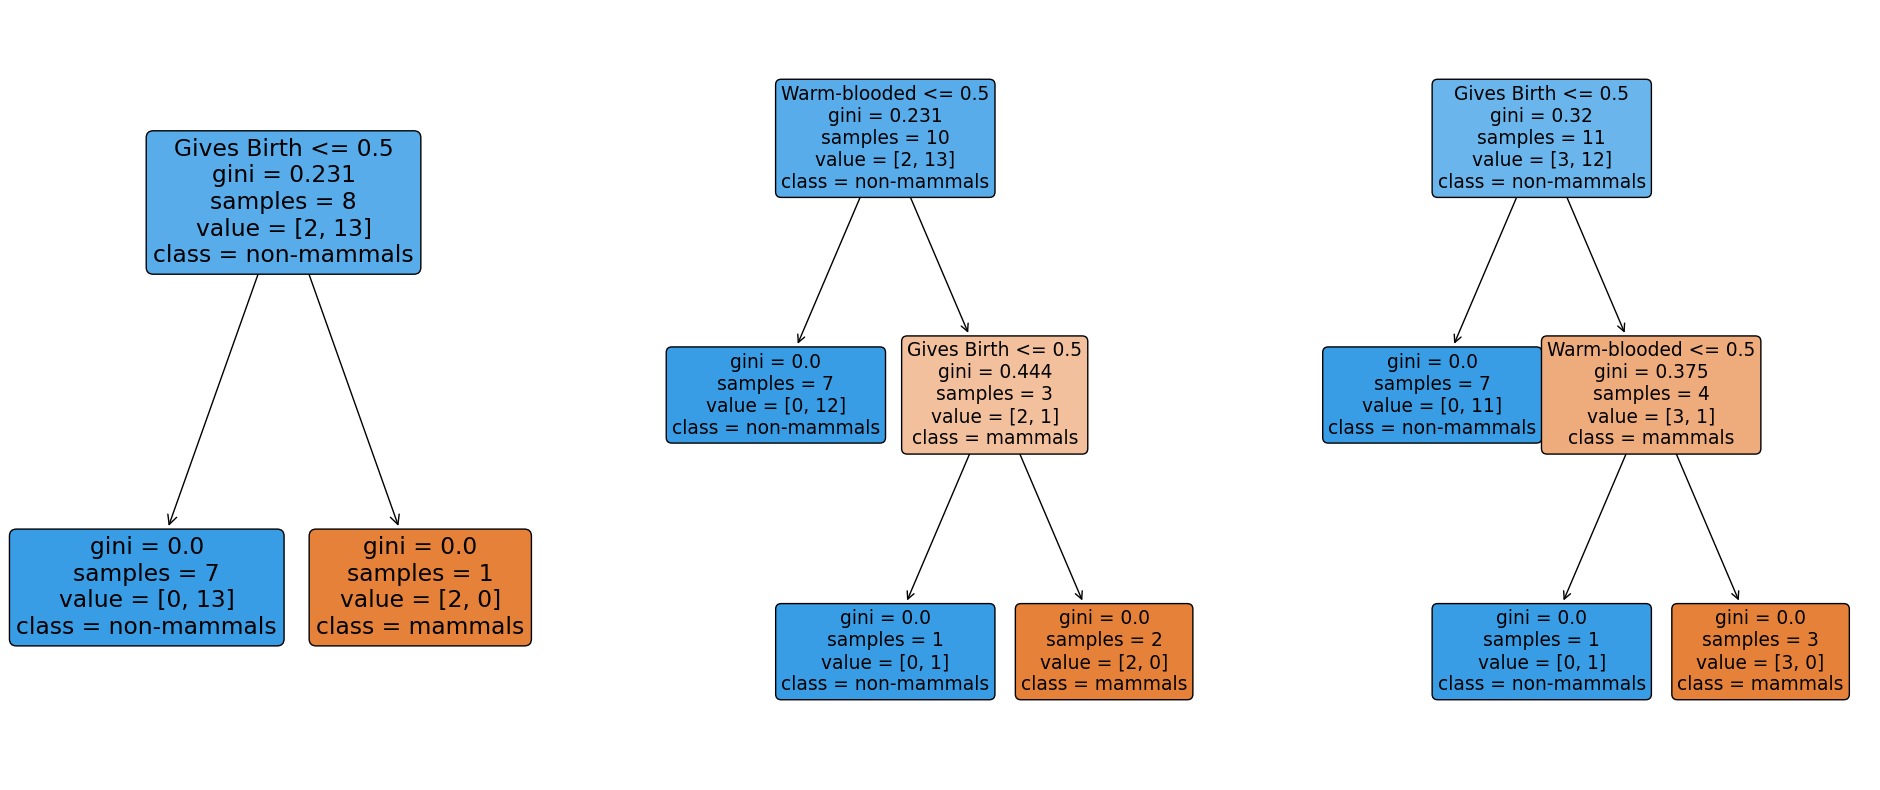

In [ ]:
plt.figure(figsize=(n_tree*8, 10))
for idx, clf_t in enumerate(clf_bag.estimators_):
  plt.subplot(1, n_tree,idx+1)
  sklearn.tree.plot_tree(clf_t,
                      feature_names = df.columns.drop(['Name', 'Class']),
                      class_names = ["mammals", "non-mammals"],
                      filled=True, rounded=True)

Notice the similarities! The bagged trees are highly correlated.

Let’s look at the bootstrap sets each tree was trained on:

In [ ]:
for samples in clf_bag.estimators_samples_:
  print(df.iloc[samples])
  print("-" * 70)

          Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
7       pigeon             1            0                 0                1   
7       pigeon             1            0                 0                1   
5       komodo             0            0                 0                0   
11     penguin             1            0                 1                0   
2       salmon             0            0                 1                0   
14  salamander             0            0                 1                0   
1       python             0            0                 0                0   
3        whale             1            1                 1                0   
13         eel             0            0                 1                0   
3        whale             1            1                 1                0   
13         eel             0            0                 1                0   
2       salmon             0            

Random forest
-------------

In [ ]:
n_tree = 3
clf_rf = RandomForestClassifier(n_estimators=n_tree, )
clf_rf = clf_rf.fit(X, y)

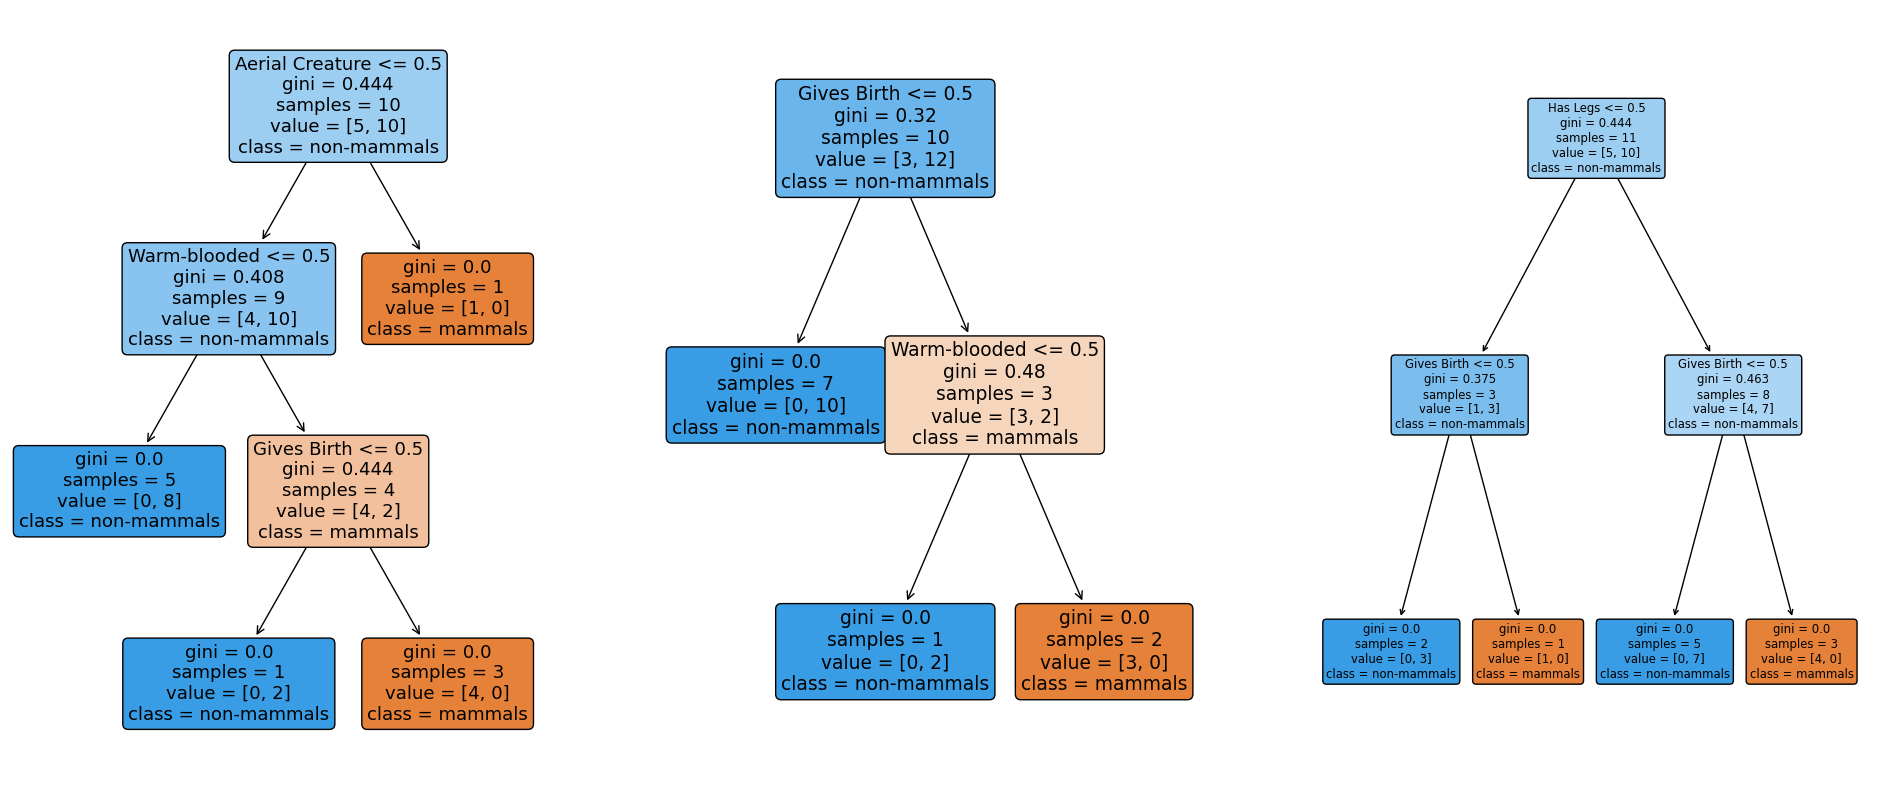

In [ ]:
plt.figure(figsize=(n_tree*8, 10))
for idx, clf_t in enumerate(clf_rf.estimators_):
  plt.subplot(1, n_tree,idx+1)
  sklearn.tree.plot_tree(clf_t,
                      feature_names = df.columns.drop(['Name', 'Class']),
                      class_names = ["mammals", "non-mammals"],
                      filled=True, rounded=True)

These trees are much less correlated.

In [ ]:
for idx, clf_t in enumerate(clf_rf.estimators_):
    print(clf_t.feature_importances_)

[0.45714286 0.4        0.         0.14285714 0.         0.        ]
[0.5 0.5 0.  0.  0.  0. ]
[0.         0.98863636 0.         0.         0.01136364 0.        ]


AdaBoost
--------

In [ ]:
n_tree = 3
clf_ab = AdaBoostClassifier(n_estimators=n_tree)
clf_ab = clf_ab.fit(X, y)

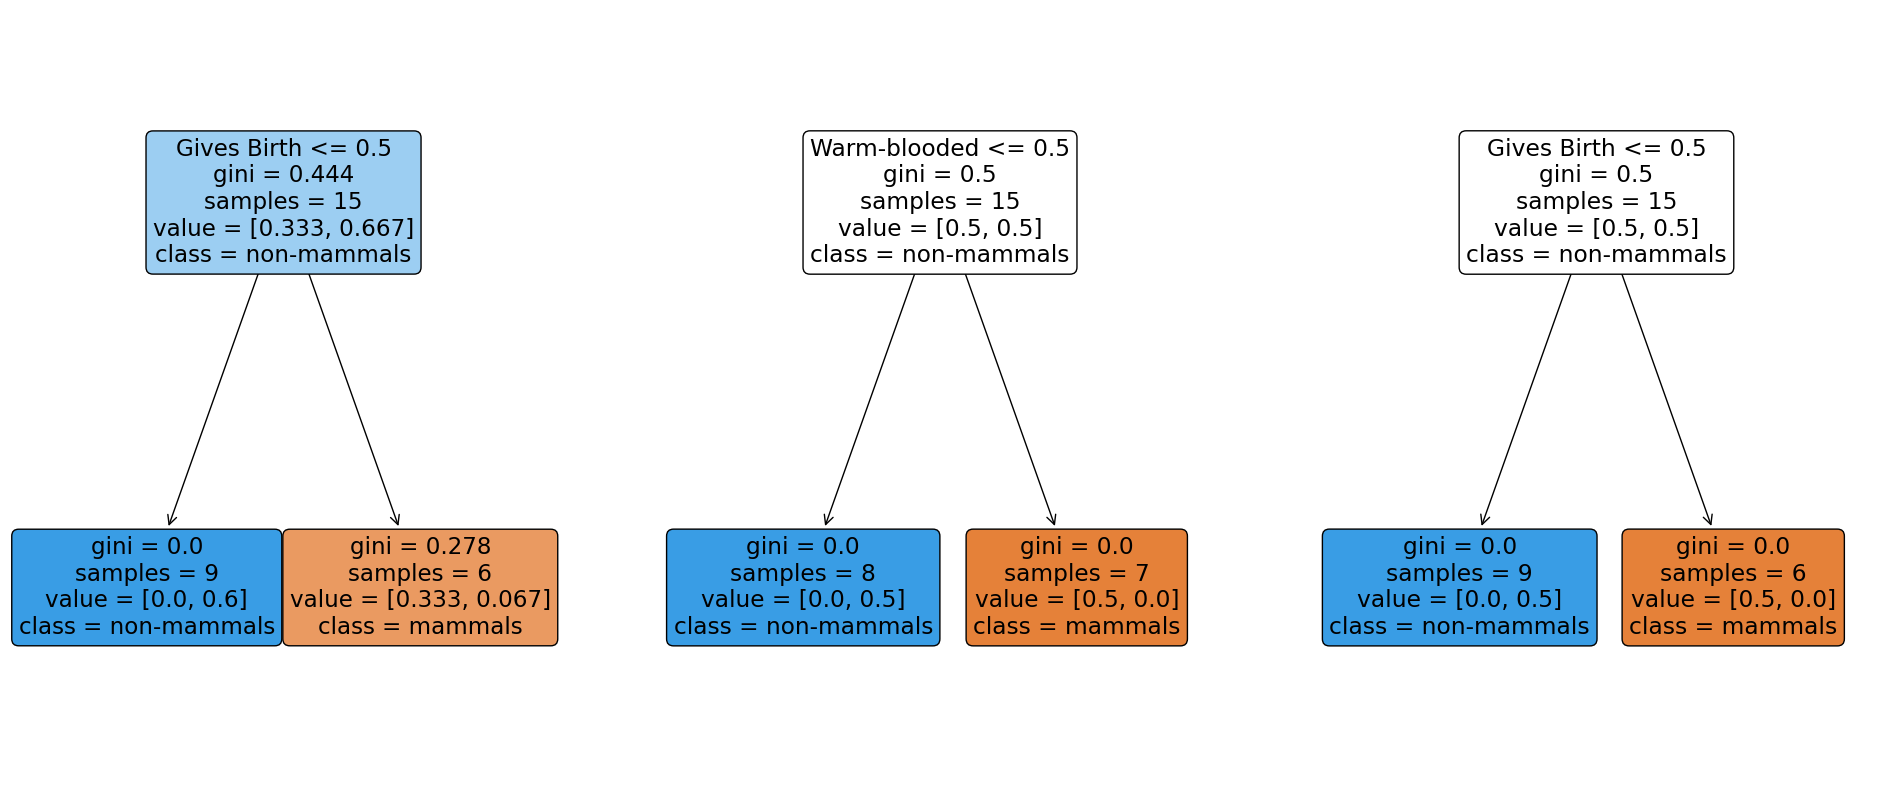

In [ ]:
plt.figure(figsize=(n_tree*8, 10))
for idx, clf_t in enumerate(clf_ab.estimators_):
  plt.subplot(1, n_tree,idx+1)
  sklearn.tree.plot_tree(clf_t,
                      feature_names = df.columns.drop(['Name', 'Class']),
                      class_names = ["mammals", "non-mammals"],
                      filled=True, rounded=True)

The output will be a weighted average of the predictions of all three trees.

As we add more trees, the ensemble accuracy increases:

In [ ]:
for p in clf_ab.staged_predict(X):
  print(np.mean(p==y))

0.9333333333333333
1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
